In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7502d63314f21a460fc18cd7351f159d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leua
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | weymouth
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | niquelandia
Processing Record 9 of Set 1 | bairiki
Processing Record 10 of Set 1 | villamontes
Processing Record 11 of Set 1 | samusu
City not found. Skipping...
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | ambulu
Processing Record 18 of Set 1 | port hardy
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | souillac

Processing Record 37 of Set 4 | lata
Processing Record 38 of Set 4 | papayal
Processing Record 39 of Set 4 | solsvik
City not found. Skipping...
Processing Record 40 of Set 4 | puro
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | luang prabang
Processing Record 43 of Set 4 | ciudad bolivar
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | palmer
Processing Record 46 of Set 4 | inhambane
Processing Record 47 of Set 4 | koshurnikovo
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | kuching
Processing Record 50 of Set 4 | gravina in puglia
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | rio claro
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | champerico
Processing Record 5 of Set 5 | monkey hill
Processing Record 6 of Set 5 | paita
Processing Record 7 of Set 5 | zhuhai
Processing Record 8 of Set 5 | kaseda
Processing Record

Processing Record 27 of Set 8 | kalabo
Processing Record 28 of Set 8 | kudahuvadhoo
Processing Record 29 of Set 8 | marienburg
Processing Record 30 of Set 8 | nyuksenitsa
Processing Record 31 of Set 8 | banjar
Processing Record 32 of Set 8 | san quintin
Processing Record 33 of Set 8 | belmonte
Processing Record 34 of Set 8 | coruripe
Processing Record 35 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 37 of Set 8 | payo
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | jiddah
City not found. Skipping...
Processing Record 40 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 41 of Set 8 | san carlos
Processing Record 42 of Set 8 | solaro
Processing Record 43 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 8 | honiara
Processing Record 45 of Set 8 | ardesen
Processing Record 46 of Set 8 | sydney mines
Processing Record 47 of Set 8 

Processing Record 12 of Set 12 | poshekhonye
Processing Record 13 of Set 12 | razole
Processing Record 14 of Set 12 | abilene
Processing Record 15 of Set 12 | ha tinh
Processing Record 16 of Set 12 | cradock
Processing Record 17 of Set 12 | cabinda
Processing Record 18 of Set 12 | prince george
Processing Record 19 of Set 12 | staraya poltavka
Processing Record 20 of Set 12 | jaragua
Processing Record 21 of Set 12 | vila do maio
Processing Record 22 of Set 12 | camacha
Processing Record 23 of Set 12 | amposta
Processing Record 24 of Set 12 | okhotsk
Processing Record 25 of Set 12 | port arthur
Processing Record 26 of Set 12 | stillwater
Processing Record 27 of Set 12 | fort nelson
Processing Record 28 of Set 12 | jermuk
Processing Record 29 of Set 12 | cabo rojo
Processing Record 30 of Set 12 | costinesti
Processing Record 31 of Set 12 | vysokaya gora
Processing Record 32 of Set 12 | dwarka
Processing Record 33 of Set 12 | canton
Processing Record 34 of Set 12 | guanica
Processing Reco

In [10]:
len(city_data)

553

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leua,48.2156,18.6071,37.99,72,100,3.85,SK,2021-01-31 15:02:08
1,Geraldton,-28.7667,114.6000,78.80,57,0,19.57,AU,2021-01-31 15:02:08
2,Mataura,-46.1927,168.8643,55.17,71,100,2.06,NZ,2021-01-31 15:02:08
3,Weymouth,42.2209,-70.9398,19.00,52,40,3.44,US,2021-01-31 15:02:08
4,Torbay,47.6666,-52.7314,33.01,93,90,12.66,CA,2021-01-31 15:02:08
5,Arraial Do Cabo,-22.9661,-42.0278,89.60,51,0,18.41,BR,2021-01-31 15:00:07
6,Bredasdorp,-34.5322,20.0403,75.00,68,0,8.99,ZA,2021-01-31 15:02:09
7,Niquelandia,-14.4739,-48.4597,88.93,52,46,2.08,BR,2021-01-31 15:00:32
8,Bairiki,1.3292,172.9752,80.60,89,75,6.91,KI,2021-01-31 15:02:09
9,Villamontes,-21.2500,-63.5000,91.89,39,40,4.45,BO,2021-01-31 15:02:09


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leua,SK,2021-01-31 15:02:08,48.2156,18.6071,37.99,72,100,3.85
1,Geraldton,AU,2021-01-31 15:02:08,-28.7667,114.6000,78.80,57,0,19.57
2,Mataura,NZ,2021-01-31 15:02:08,-46.1927,168.8643,55.17,71,100,2.06
3,Weymouth,US,2021-01-31 15:02:08,42.2209,-70.9398,19.00,52,40,3.44
4,Torbay,CA,2021-01-31 15:02:08,47.6666,-52.7314,33.01,93,90,12.66
5,Arraial Do Cabo,BR,2021-01-31 15:00:07,-22.9661,-42.0278,89.60,51,0,18.41
6,Bredasdorp,ZA,2021-01-31 15:02:09,-34.5322,20.0403,75.00,68,0,8.99
7,Niquelandia,BR,2021-01-31 15:00:32,-14.4739,-48.4597,88.93,52,46,2.08
8,Bairiki,KI,2021-01-31 15:02:09,1.3292,172.9752,80.60,89,75,6.91
9,Villamontes,BO,2021-01-31 15:02:09,-21.2500,-63.5000,91.89,39,40,4.45


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

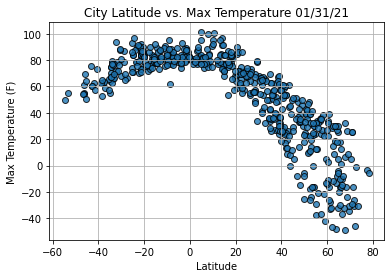

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

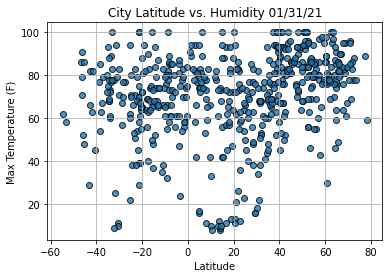

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

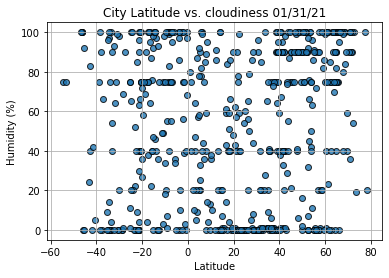

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

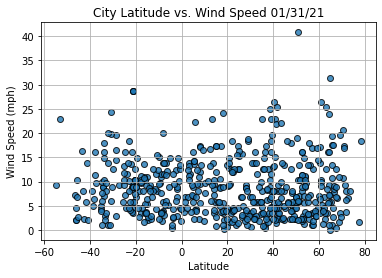

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
city_data_df.index.name = 'City_ID'
index13 = city_data_df.loc[13]
index13

City                       Ambulu
Country                        ID
Date          2021-01-31 15:02:10
Lat                        -8.345
Lng                       113.606
Max Temp                    77.68
Humidity                       85
Cloudiness                    100
Wind Speed                   1.81
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

City_ID
0       True
1      False
2      False
3       True
4       True
       ...  
548     True
549    False
550     True
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [22]:

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Leua,SK,2021-01-31 15:02:08,48.2156,18.6071,37.99,72,100,3.85
3,Weymouth,US,2021-01-31 15:02:08,42.2209,-70.9398,19.00,52,40,3.44
4,Torbay,CA,2021-01-31 15:02:08,47.6666,-52.7314,33.01,93,90,12.66
8,Bairiki,KI,2021-01-31 15:02:09,1.3292,172.9752,80.60,89,75,6.91
11,Hami,CN,2021-01-31 15:02:10,42.8000,93.4500,25.95,80,0,5.35


In [23]:
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Leua,SK,2021-01-31 15:02:08,48.2156,18.6071,37.99,72,100,3.85
1,Geraldton,AU,2021-01-31 15:02:08,-28.7667,114.6000,78.80,57,0,19.57
2,Mataura,NZ,2021-01-31 15:02:08,-46.1927,168.8643,55.17,71,100,2.06
3,Weymouth,US,2021-01-31 15:02:08,42.2209,-70.9398,19.00,52,40,3.44
4,Torbay,CA,2021-01-31 15:02:08,47.6666,-52.7314,33.01,93,90,12.66
...,...,...,...,...,...,...,...,...,...
548,Yumen,CN,2021-01-31 15:03:46,40.2833,97.2000,26.28,67,0,13.31
549,Ahipara,NZ,2021-01-31 15:03:46,-35.1667,173.1667,57.15,80,0,3.85
550,Miraflores,MX,2021-01-31 15:03:46,19.2167,-98.8083,57.20,47,1,3.96


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

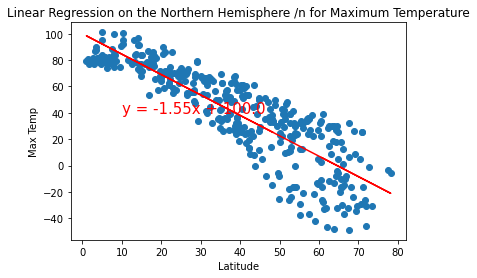

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere /n for Maximum Temperature', 'Max Temp',(10,40))

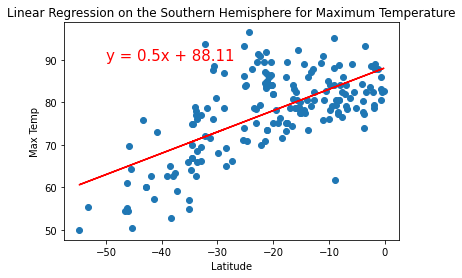

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

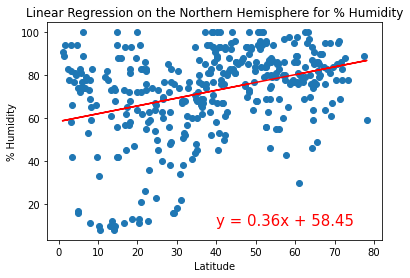

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

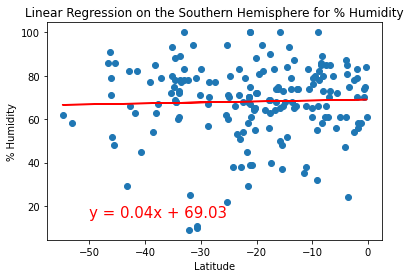

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

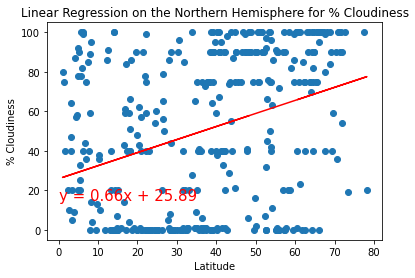

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,15))

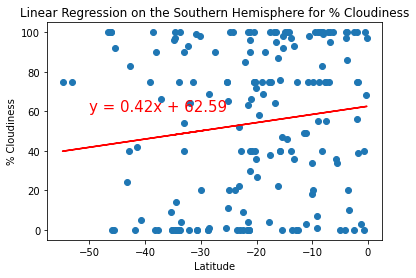

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

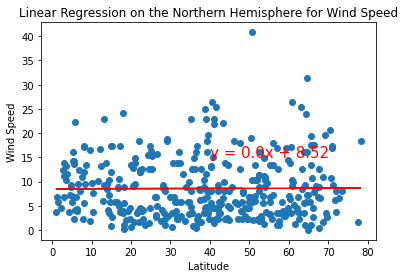

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,15))

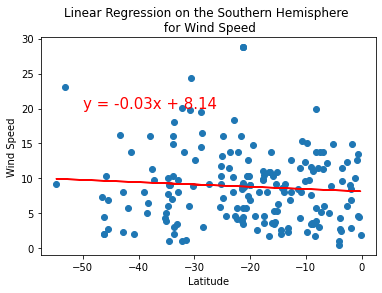

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))